In [1]:
import numpy as np
import pandas as pd
import torch
import torchvision

import matplotlib.pyplot as plt

print('CUDA available:', torch.cuda.is_available())

CUDA available: True


In [2]:
!ls /tcmldrive/databases/Public/TCGA/data/
!echo ---
!ls /tcmldrive/databases/Public/TCGA/data/train

clinical_Atlas.csv  data_table_Colorectal_Adenocarcinoma.csv  test  train
---
MSIMUT	MSS


# ∅ Dataset

In [3]:
ROOT_DIR = '/tcmldrive/databases/Public/TCGA/data/'
TRAIN_DIR = ROOT_DIR + 'train'
TEST_DIR = ROOT_DIR + 'test'

class params:
    bs = 5

# rgb_mean = (0.4914, 0.4822, 0.4465)
# rgb_std = (0.2023, 0.1994, 0.2010)

train_tfms = torchvision.transforms.Compose([
#     torchvision.transforms.RandomCrop(32, padding=4),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
#     torchvision.transforms.Normalize(rgb_mean, rgb_std),
])

In [4]:
train_ds = torchvision.datasets.ImageFolder(TRAIN_DIR, train_tfms)
test_ds = torchvision.datasets.ImageFolder(TEST_DIR, train_tfms)

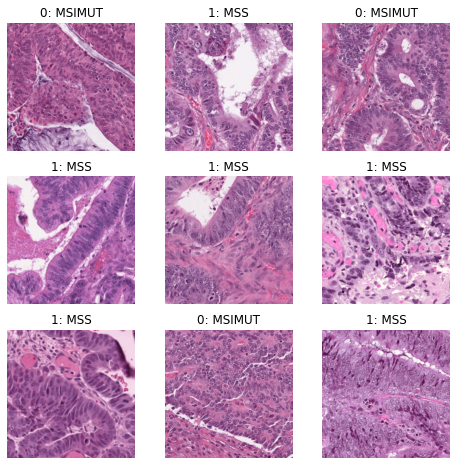

In [5]:
labels_map = {
    0: "MSIMUT",
    1: "MSS",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_ds), size=(1,)).item()
    img, label = train_ds[sample_idx]
    img = img.permute(1, 2, 0)    
    figure.add_subplot(rows, cols, i)
    plt.title(f'{label}: {labels_map[label]}')
    plt.axis("off")
    plt.imshow(img)
plt.show()

# 🚛 Dataloader

In [6]:
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=params.bs, num_workers=4, shuffle=True)

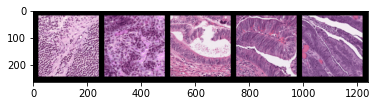

In [7]:
# images = torch.rand(4, 3, 255, 255)
images = next(iter(train_dl))[0]
plt.imshow(torchvision.utils.make_grid(images, padding=20).permute(1, 2, 0))

# 📊 Explore

In [8]:
print(f'Classes: {train_ds.classes}')
print(f'Train Len: {len(train_ds)} | Test Len: {len(test_ds)}')

Classes: ['MSIMUT', 'MSS']
Train Len: 93408 | Test Len: 98904


In [9]:
len_MSIMUT_train = np.sum(np.array(train_ds.targets) == 1)
len_MSS_train = np.sum(np.array(train_ds.targets) == 0)
len_MSIMUT_test = np.sum(np.array(test_ds.targets) == 1)
len_MSS_test = np.sum(np.array(test_ds.targets) == 0)

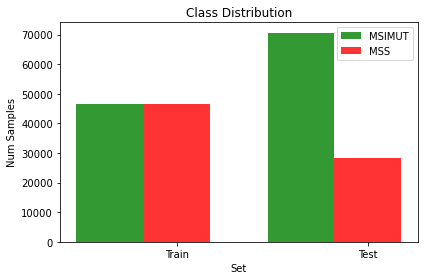

In [10]:
# data to plot
n_groups = 2
MSIMUT_lens = (len_MSIMUT_train, len_MSIMUT_test)
MSS_lens = (len_MSS_train, len_MSS_test)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, MSIMUT_lens, bar_width, alpha=opacity, color='g', label='MSIMUT')

rects2 = plt.bar(index + bar_width, MSS_lens, bar_width, alpha=opacity, color='r', label='MSS')

plt.xlabel('Set')
plt.ylabel('Num Samples')
plt.title('Class Distribution')
plt.xticks(index + bar_width, ('Train', 'Test'))
plt.legend()

plt.tight_layout()
plt.show()